<a href="https://colab.research.google.com/github/boyerb/Investments/blob/master/Ex07-Alpha_Vantage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Investments: Theory, Fundamental Analysis, and Data Driven Analytics**, Bates, Boyer, and Fletcher

In [1]:
import requests
import pandas as pd

# Replace the apikey with your own
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=KO&apikey=6OEZ4UZSVCOVSKC7'
r = requests.get(url)
data = r.json()

# The time series data lives under "Monthly Adjusted Time Series"
ts_data = data["Monthly Adjusted Time Series"]

# Convert to DataFrame
df = pd.DataFrame.from_dict(ts_data, orient="index")

# Rename columns to something cleaner
df.columns = [
    "Open", "High", "Low", "Close",
    "Adjusted Close", "Volume", "Dividend Amount"
]

# Convert index to datetime and sort chronologically
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Convert string values to numeric
df = df.astype(float)

In [2]:
pd.set_option('display.max_columns', None)   # Show all columns without truncation
pd.set_option('display.width', 1000)   # Set the display width so output stays on one line
pd.set_option("display.max_rows", 20) # Force truncation to at most 20 rows (10 from top, 10 from bottom)

In [3]:
print(df)

              Open    High    Low   Close  Adjusted Close       Volume  Dividend Amount
1999-12-31  66.690  69.000  57.38  58.250         14.2834  115452600.0             0.00
2000-01-31  57.310  66.880  55.25  57.440         14.0848  112247600.0             0.00
2000-02-29  57.750  58.380  47.56  48.630         11.9245   94966900.0             0.00
2000-03-31  49.190  51.810  42.88  46.940         11.5548  151868400.0             0.17
2000-04-28  47.440  52.380  44.75  47.250         11.6311  120064900.0             0.00
...            ...     ...    ...     ...             ...          ...              ...
2025-05-30  72.000  72.685  68.58  72.100         71.0387  305530453.0             0.00
2025-06-30  72.025  72.685  68.78  70.750         70.2092  325009841.0             0.51
2025-07-31  70.990  72.450  67.74  67.890         67.3711  358551516.0             0.00
2025-08-29  68.595  71.705  68.27  68.990         68.4626  271343743.0             0.00
2025-09-25  68.960  69.460  65.9

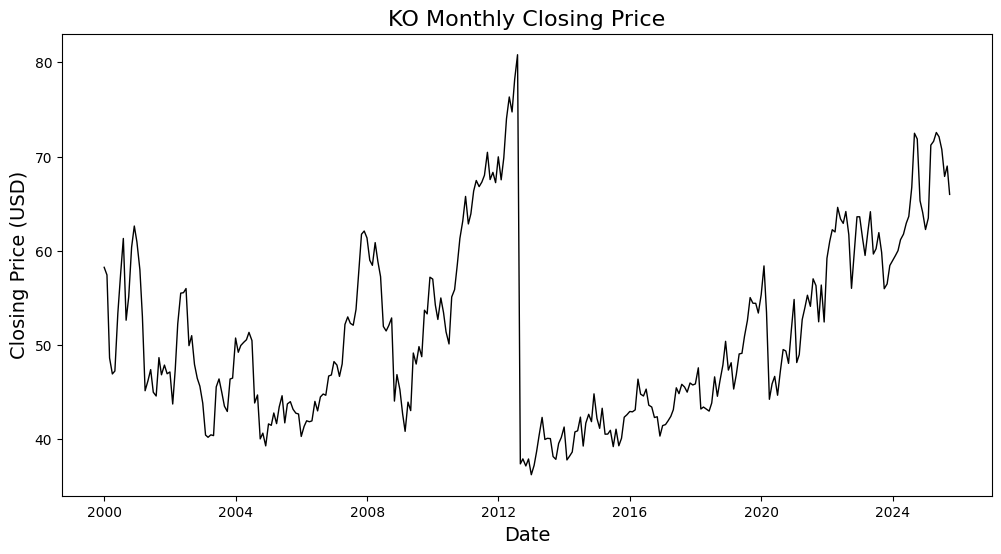

In [4]:
import matplotlib.pyplot as plt

# Plot monthly close price
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], color="black", linewidth=1)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.title("KO Monthly Closing Price", fontsize=16)
plt.grid(False)  # cleaner look
plt.show()

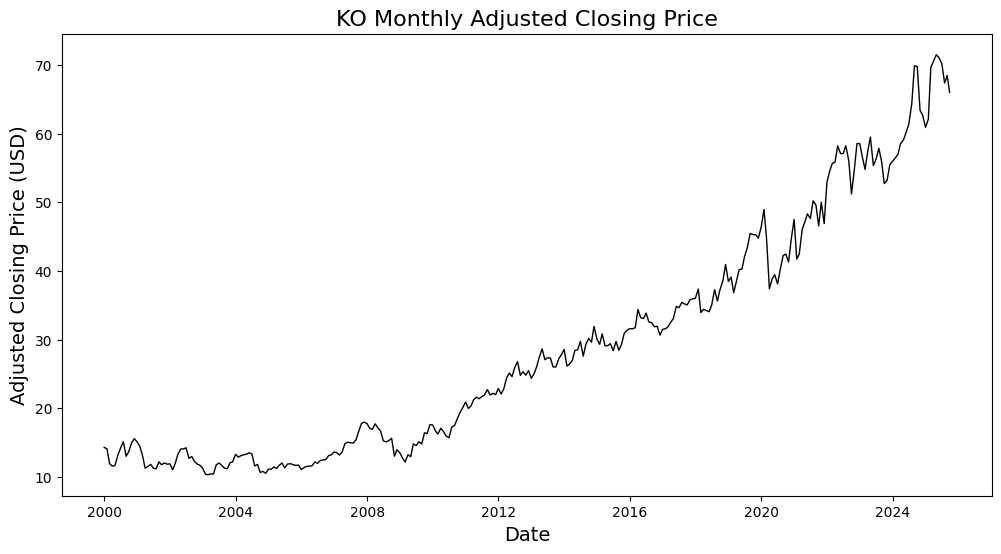

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Adjusted Close"], color="black", linewidth=1)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Closing Price (USD)", fontsize=14)
plt.title("KO Monthly Adjusted Closing Price", fontsize=16)
plt.grid(False)
plt.show()